## Assignment 1 - Classification


In [ ]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

**Start**

# dataset schema

### Attribute Information

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

 

In [ ]:


df = pd.read_excel("default of credit card client.xls", sheet_name ='Data', skiprows= 1, header = 0)

NameError: ignored

# Exploring the Data

## Features (variable names and data types)

In [ ]:
df_explore = df.copy()

In [ ]:
df.shape

(30000, 25)

In [ ]:
df_explore.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [ ]:
df_explore.sample(10, random_state=0)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
8225,8226,20000,1,1,2,33,1,2,2,2,2,2,17971,17399,19057,18453,19755,19288,0,2260,0,1600,0,644,0
10794,10795,20000,2,2,2,35,0,0,2,0,0,0,16528,19347,18600,19000,19000,20000,3400,0,1000,0,1000,0,0
9163,9164,230000,2,1,1,44,1,-1,-1,-1,-1,-2,3884,949,2864,933,0,0,949,2873,933,0,0,0,0
26591,26592,100000,1,2,1,42,0,0,0,0,0,0,98430,99998,16138,17758,18774,20272,5000,2000,2000,2000,2000,2000,0
6631,6632,150000,1,1,2,29,-2,-2,-2,-2,-2,-2,4583,6917,831,6469,5138,7810,6989,833,6488,5153,7833,7130,0
14161,14162,50000,1,2,2,25,-1,3,2,0,0,0,10695,10386,9993,9993,15300,0,0,0,200,5307,0,0,1
252,253,140000,2,2,2,26,0,0,0,0,0,0,101551,105246,104781,105334,107699,106828,5366,5087,3605,3894,3785,3304,1
2566,2567,280000,1,1,2,31,1,-1,-1,0,0,-2,0,3495,2783,2001,-339,-1180,3495,2783,0,0,0,0,0
3478,3479,500000,2,1,2,36,-1,-1,-1,-1,-1,-1,10935,4079,3943,3338,1224,31022,4081,4283,3338,1224,31022,1088,0
2917,2918,310000,2,2,1,44,-1,-1,-2,-2,-2,-2,500,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Sort by dtype 
dep_var=['default payment next month']

categorical_vars = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

discrete_vars=['LIMIT_BAL','AGE']

continuous_vars =['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6' ]

### Count the missing values

In [ ]:
df_explore.isna()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_explore = df_explore.dropna() # drop NA

## Quantitative features

In [ ]:
df_explore.loc[:, dep_var + discrete_vars + continuous_vars].describe()

,default payment next month,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,0.221200,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,0.415062,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,0.000000,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,0.000000,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,0.000000,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1.000000,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


## Dependent variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


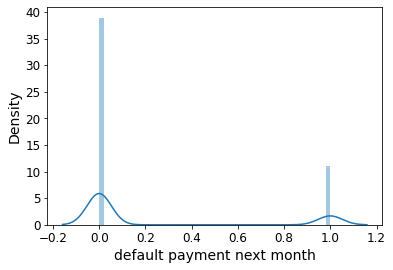

In [ ]:
sns.distplot(df_explore['default payment next month'])

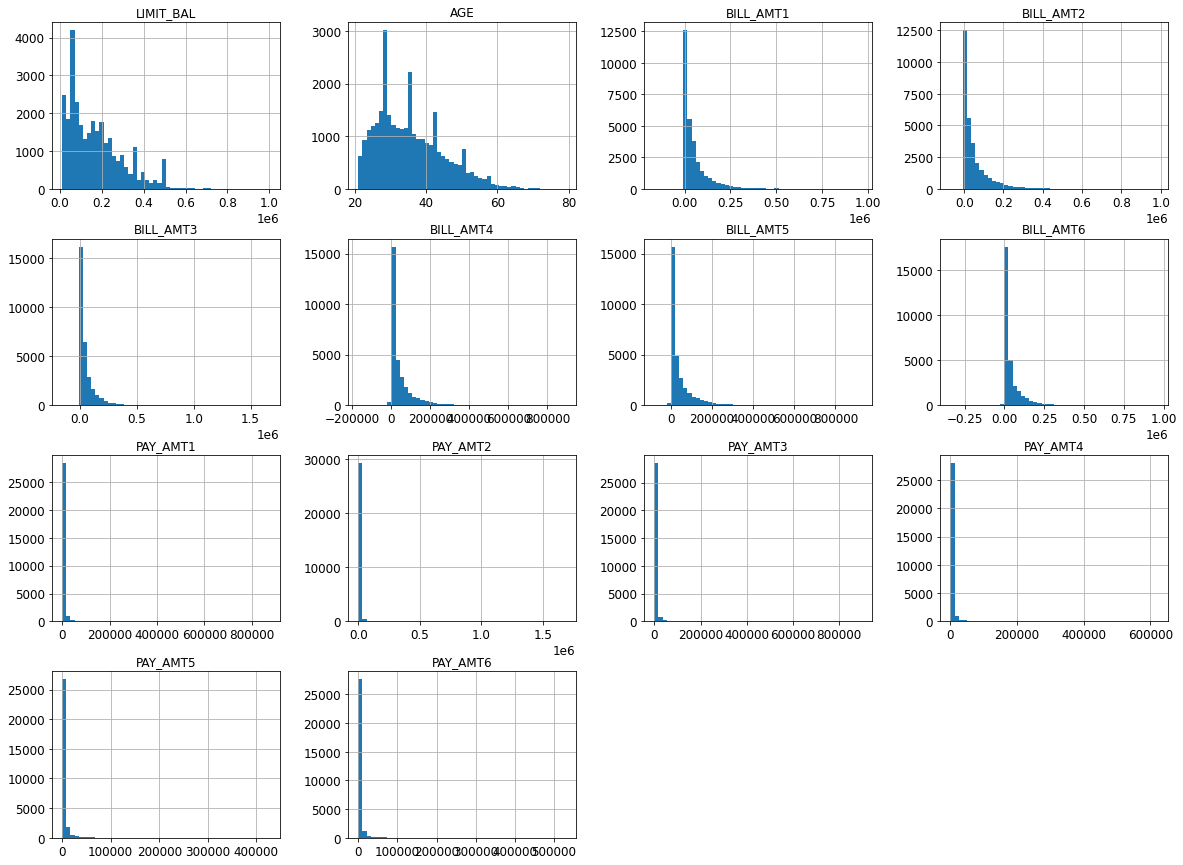

In [ ]:
df_explore.loc[:, discrete_vars + continuous_vars].hist(bins=50, figsize=(20,15))
plt.show()

### Correlation Analysis

In [ ]:
corr_matrix = df_explore.loc[:, ['default payment next month'] + continuous_vars].corr(method='pearson')
corr_matrix['default payment next month'].sort_values(ascending=False)

default payment next month    1.000000
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
Name: default payment next month, dtype: float64

In [ ]:
corr_matrix = df_explore.loc[:, ['default payment next month'] + discrete_vars].corr(method='pearson')
corr_matrix['default payment next month'].sort_values(ascending=False)

default payment next month    1.00000
AGE                           0.01389
LIMIT_BAL                    -0.15352
Name: default payment next month, dtype: float64

In [ ]:
sns.pairplot(data=df_explore.loc[:, ['default payment next month'] + continuous_vars])
plt.show()

In [ ]:
for item in [x for x in categorical_vars if x != 'Education']:
#    if item == 'amenities':
#        next
    plt.figure(figsize=(5,5))
    sns.boxplot(x=item, y='default payment next month', data=df_explore)
    if len(df_explore[item].unique()) > 4:
        plt.xticks(rotation=45)
    plt.show()

## Data Preprocessing

Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
Set the random seed to 123 (For splitting or any other random algorithm)
Split data into training (80%) and testing (20%)
Use Cross-validation with 5-folds
For other parameters, use default


In [ ]:

# a bit of extra pre-processing
# others = [x for x in df['property_type'].value_counts().index if df['property_type'].value_counts()[x] <= 10]
# df['property_type'] = df['property_type'].apply(lambda x: 'Other' if x in others else x)

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

def rmse(a, b):
    return np.sqrt(np.mean((a-b)**2))
pd.options.display.max_columns = None
# to make this notebook's output identical at every run
np.random.seed(123)

In [ ]:
df.sample(5)

## Imputers

In [ ]:
print(df[['SEX']].values[:, 0])
tfmr = SimpleImputer(strategy='constant')
# we place double brackets as a trick - sklearn expects arrays of the shape (n, 1). 
# the pandas Series.values method gives the shape (n, ), so we pass a DataFrame instead
# by including a list of one column header.
print(tfmr.fit_transform(df[['SEX']].values)[:, 0])


### Categorical encoders

 ### Feature scalers

In [ ]:
print(df[['BILL_AMT4']].values[:, 0])
tfmr = MinMaxScaler()
print(tfmr.fit_transform(df[['BILL_AMT4']].values)[:, 0])

print(df[['BILL_AMT5']].values[:, 0])
tfmr = MinMaxScaler()
print(tfmr.fit_transform(df[['BILL_AMT5']].values)[:, 0])

Bringing the pipeline together

In [ ]:
# Categorical - impute, one hot encode
cat_si_step = ('si', SimpleImputer(strategy='constant'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_si_step, cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_vars)]

# Numerical - impute, scale
num_si_step = ('si', SimpleImputer(strategy='median'))
num_scl_step = ('scl', MinMaxScaler())
num_steps = [num_si_step, num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, discrete_vars + continuous_vars)]

In [ ]:
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_vars + discrete_vars + continuous_vars])
X = ct.transform(df[categorical_vars + discrete_vars + continuous_vars])
# We know from our exploration that the dependent variable 'price' does not have any missing values. 
# It is also generally not necessary to apply transformations to normalize or scale
# the dependent variable.
y = df[['default payment next month']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

### Basic Regressions

In [ ]:

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, np.ravel(y_train))

In [ ]:
def display_results(model, X, y):
    print("RMSE:", rmse(model.predict(X), y))
    print("Predicted 1-5:", model.predict(X_test[0:5]))
    print("Actual 1-5:", y_test[0:5, 0])
    
display_results(reg, X, y)

## ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

enr = ElasticNet()
enr.fit(X_train, np.ravel(y_train))
display_results(enr, X, y)

SGDRegressor

In [ ]:
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(tol=1e-3)
clf.fit(X_train, np.ravel(y_train))
display_results(clf, X, y)

DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, np.ravel(y_train))
display_results(dtr, X, y)

### Logistic Regression¶

In [ ]:

#from sklearn.linear_model import LogisticRegression
#lr=LogisticRegression()
#lr.fit(X_train, np.ravel(y_train))
#display_results(lr, X, y)
#comment out because run out of space

In [ ]:
## ElasticNet has the best RMSE which means most fit

### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
enr = ElasticNet()
scores = cross_val_score(enr, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
np.sqrt(-scores)

In [ ]:
 #print out our results.
 def display_scores(scores):
    print("Scores:", np.sqrt(-scores))
    print("Mean:", np.sqrt(-scores).mean())
    print("Standard deviation:", np.sqrt(-scores).std())

display_scores(scores)

In [ ]:
clf = SGDRegressor(max_iter=1000, tol=1e-3)
scores = cross_val_score(clf, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
display_scores(scores)

In [ ]:
rfr = DecisionTreeRegressor()
scores = cross_val_score(dtr, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
display_scores(scores)

SGDRegressor has better result in cross validation by Mean of 0.37


## ROC curve

In [ ]:
from sklearn import linear_model as lm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
final_model_smv_lin = SVC(kernel='linear').fit(X_train, np.ravel(y_train))

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, final_model_smv_lin.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
y_test, final_model_smv_lin.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

In [ ]:
#The threshold is about 0.7 precision and 0.3 recall 

##KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
  
    'n_neighbors': [3, 5, 10, 20]
}
# Create a based model
knn = KNeighborsClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 5
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
results = cross_val_score(model, X_train, np.ravel(y_train), cv=kfold)

print(results.mean())

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [4, 5, 10, 20, 50] # as requried
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_features = 3
num_trees = 100

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_train, np.ravel(y_train), cv=kfold)

print(results.mean())

#conclusion

The mean of KNN is lower than RF, thus KNN is a better model than RF.

#### Conclusions

Explain your results and choices